In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [172]:
url = r"C:\Users\javierheras\Desktop\Tech challengue\technical_challenge_DA\data\measurements.csv"
measures = pd.read_csv(url,sep=',')
measures.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


In [173]:
measures.shape

(388, 12)

In [174]:
#there are three columns with a lot of empty data so we will analyze if they are relevant and if not we will eliminate them.
measures.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [175]:
measures['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [176]:
measures['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [177]:
measures['AC'].value_counts()

0    358
1     30
Name: AC, dtype: int64

In [178]:
measures['rain'].value_counts()

0    340
1     48
Name: rain, dtype: int64

In [179]:
measures['sun'].value_counts()

0    356
1     32
Name: sun, dtype: int64

In [180]:
measures.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [181]:
measures.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [182]:
#We need to convert the data to numerical data in order to make accurate calculations.
measures['distance'] = measures['distance'].str.replace(',','.').astype('float32')
measures['consume'] = measures['consume'].str.replace(',','.').astype('float32')
measures['temp_inside'] = measures['temp_inside'].str.replace(',','.').astype('float32')
measures['refill liters'] = measures['refill liters'].str.replace(',','.').astype('float32')
measures['specials'] = measures['specials'].str.lower()

In [183]:
consume_gas = measures.groupby('gas_type').agg({'consume':'mean'}).reset_index()
consume_gas

,gas_type,consume
0,E10,4.931250
1,SP98,4.899123


In [184]:
# there are no relevant differences in the means of the variables depending on the type of fuel oil.
features = measures.groupby('gas_type').agg({'consume':'mean','distance':'mean','speed':'mean','temp_inside':'mean','temp_outside':'mean'}).reset_index()
features

,gas_type,consume,distance,speed,temp_inside,temp_outside
0,E10,4.931250,21.096251,43.506250,21.917198,10.11875
1,SP98,4.899123,18.639912,40.820175,21.938356,12.22807


In [185]:
# If we see that the use of air conditioning is relevant in consumption, so it may be a variable to look at.
features1 = measures.groupby(['gas_type','AC']).agg({'consume':'mean','distance':'mean','speed':'mean','temp_inside':'mean','temp_outside':'mean'}).reset_index()
features1

,gas_type,AC,consume,distance,speed,temp_inside,temp_outside
0,E10,0,4.922876,20.898039,43.130719,21.873333,10.052288
1,E10,1,5.114286,25.428572,51.714286,22.857143,11.571429
2,SP98,0,4.854146,19.018049,41.273171,21.816326,11.741463
3,SP98,1,5.300000,15.269566,36.782609,22.978260,16.565217


In [186]:
# Whether the day is sunny or not influences the temperature, which is also relevant for consumption.
features2 = measures.groupby(['gas_type','sun']).agg({'consume':'mean','distance':'mean','speed':'mean','temp_inside':'mean','temp_outside':'mean'}).reset_index()
features2

,gas_type,sun,consume,distance,speed,temp_inside,temp_outside
0,E10,0,4.972297,20.938513,42.993243,21.856165,9.689189
1,E10,1,4.425000,23.041666,49.833333,22.727272,15.416667
2,SP98,0,4.960096,17.795673,40.600962,21.854271,11.302885
3,SP98,1,4.265000,27.420000,43.100000,22.775000,21.850000


In [187]:
features3 = measures.groupby(['gas_type','rain']).agg({'consume':'mean','distance':'mean','speed':'mean','temp_inside':'mean','temp_outside':'mean'}).reset_index()
features3

,gas_type,rain,consume,distance,speed,temp_inside,temp_outside
0,E10,0,4.856945,21.590973,43.513889,21.904255,10.326389
1,E10,1,5.600000,16.643749,43.437500,22.031250,8.250000
2,SP98,0,4.786224,18.520918,40.678571,21.973404,12.964286
3,SP98,1,5.590625,19.368750,41.687500,21.725807,7.718750


In [188]:
measures = measures.drop(['specials'], axis=1)

In [189]:
measures = measures.drop(['refill liters'], axis=1)

In [190]:
measures = measures.drop(['refill gas'], axis=1)

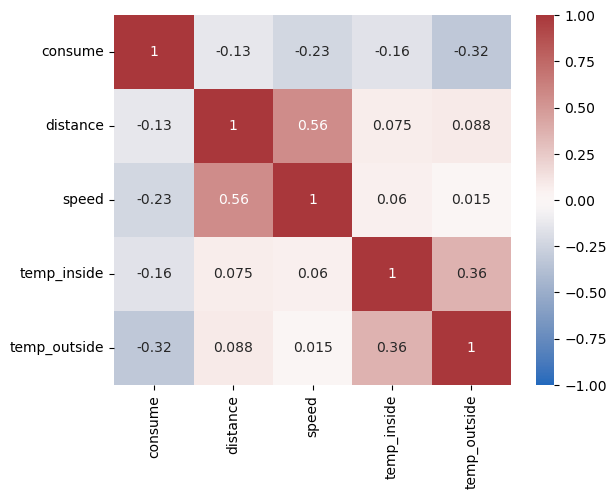

In [191]:
sns.heatmap(data=measures[['gas_type','consume','distance','speed','temp_inside','temp_outside']].corr(), 
            annot=True,cmap="vlag", vmin=-1,vmax=1, center=0)
plt.savefig('heatmap.png')

In [192]:
measures

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [193]:
measures['fuel'] = measures['gas_type'].replace({'E10':0,'SP98':1})

In [194]:
measures = measures.drop(['gas_type'], axis=1)

In [195]:
measures

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,fuel
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,1
384,16.1,4.3,38,25.0,31,1,0,0,1
385,16.0,3.8,45,25.0,19,0,0,0,1
386,15.4,4.6,42,25.0,31,1,0,0,1


In [196]:
measures.isnull().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
AC               0
rain             0
sun              0
fuel             0
dtype: int64

In [197]:
measures = measures.dropna()

In [198]:
measures.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
AC              0
rain            0
sun             0
fuel            0
dtype: int64

In [209]:
px.scatter(measures,x='temp_outside',y='consume',color='fuel',size='consume',title='Consume vs Temp Outside')

In [212]:
px.scatter(measures,x='temp_inside',y='consume',color='fuel',size='consume',title='Consume vs Temp inside')

In [213]:
px.scatter(measures,x='speed',y='consume',color='fuel',size='consume',title='Consume vs Speed')

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [200]:
X = measures.drop('consume',axis = 1)
y = measures['consume']

In [201]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [202]:
z_scaler = StandardScaler()
X = z_scaler.fit_transform(X)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.02190636366734222